In [45]:
# Data analysis
import numpy as np
import pandas as pd
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

df = pd.read_csv('fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [46]:
df.drop(['id','name'], axis=1, inplace=True)

In [47]:
df.isna().sum()

date                         0
manner_of_death              0
armed                      207
age                        300
gender                       3
race                       688
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       466
body_camera                  0
longitude                  314
latitude                   314
is_geocoding_exact           0
dtype: int64

In [48]:
df.flee.value_counts()

Not fleeing    3927
Car            1050
Foot            838
Other           244
Name: flee, dtype: int64

In [49]:
df.flee.fillna('Not fleeing', inplace=True)

In [50]:
df.armed.value_counts()

gun                    3757
knife                   947
unarmed                 418
toy weapon              223
vehicle                 212
                       ... 
claimed to be armed       1
air pistol                1
bean-bag gun              1
barstool                  1
nail gun                  1
Name: armed, Length: 98, dtype: int64

In [51]:
df.armed.fillna(df.armed.value_counts().index[0], inplace=True)

In [52]:
df.dropna(axis=0, how='any', inplace=True)
print("There are {}".format(df.isna().sum().sum()), "missing values left in the dataframe")

There are 0 missing values left in the dataframe


In [53]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month

In [54]:
df.head()

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month
0,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2015,1
1,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2015,1
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,2015,1
3,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2015,1
4,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,2015,1


In [55]:
df_date = df[['date','armed']].groupby('date').count().sort_values(by='date')
df_date.rename(columns={'armed':'count'}, inplace=True)
df_date.head()

,count
date,
2015-01-02,2
2015-01-03,1
2015-01-04,3
2015-01-05,1
2015-01-06,4


<AxesSubplot:title={'center':'Daily Fatal Shootings'}, xlabel='date', ylabel='count'>

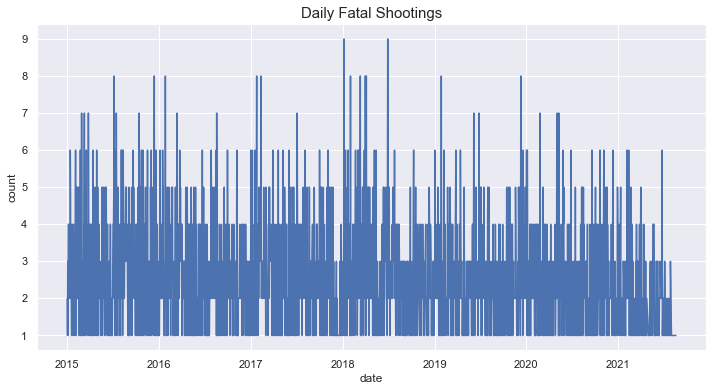

In [56]:
plt.figure(figsize=(12,6))
plt.title('Daily Fatal Shootings', fontsize=15)
sns.lineplot(x=df_date.index, y='count', data=df_date)

Text(0.5, 1.0, 'Fatal Shootings - 10 day average')

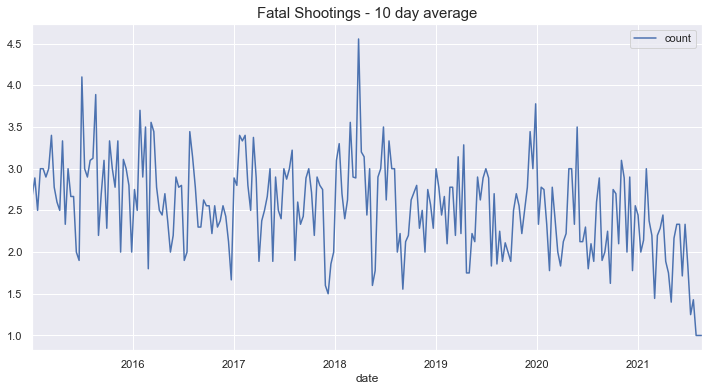

In [57]:
df_date.resample('10D').mean().plot(figsize=(12,6))
plt.title('Fatal Shootings - 10 day average', fontsize=15)

In [58]:
!pip install sidetable
import sidetable
df.stb.freq(['state'], thresh=50)

,state,count,percent,cumulative_count,cumulative_percent
0,CA,793,14.513177,793,14.513177
1,TX,479,8.766471,1272,23.279649
2,FL,370,6.771596,1642,30.051245
3,AZ,237,4.337482,1879,34.388726
4,CO,193,3.532211,2072,37.920937
5,GA,191,3.495608,2263,41.416545
6,OH,163,2.983163,2426,44.399707
7,OK,162,2.964861,2588,47.364568
8,others,2876,52.635432,5464,100.000000


C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Age Distribution of Deaths'}, xlabel='age', ylabel='Density'>

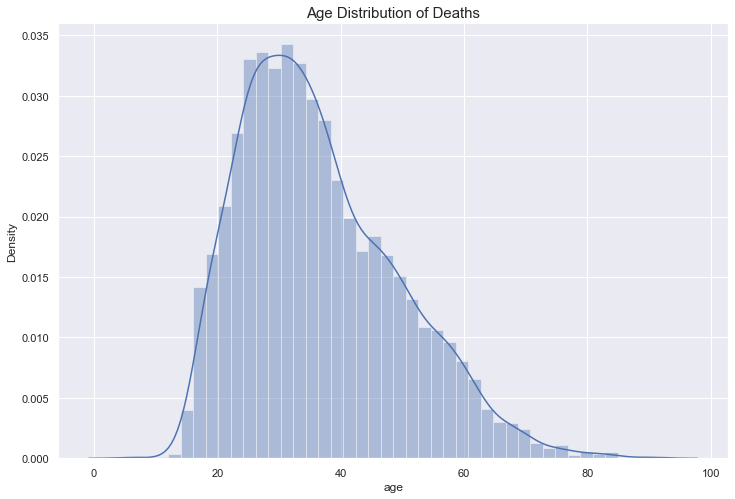

In [59]:
plt.figure(figsize=(12,8))
plt.title('Age Distribution of Deaths', fontsize=15)
sns.distplot(df.age)

In [60]:
df_race = df[['race','year','armed']].groupby(['race','year']).count().reset_index()
df_race.rename(columns={'armed':'number_of_deaths'}, inplace=True)
df_race.head()

,race,year,number_of_deaths
0,A,2015,14
1,A,2016,14
2,A,2017,14
3,A,2018,20
4,A,2019,19


In [61]:
df_pop = pd.DataFrame({'race':['W','B','A','H','N','O'],
'population':[0.601, 0.134, 0.059, 0.185, 0.013, 0.008]})
df_pop['population'] = df_pop['population']*328
df_pop

,race,population
0,W,197.128
1,B,43.952
2,A,19.352
3,H,60.680
4,N,4.264
5,O,2.624


In [63]:
df_race = pd.merge(df_race, df_pop, on='race')
df_race['deaths_per_million'] = df_race['number_of_deaths'] / df_race['population']
df_race.head()

,race,year,number_of_deaths,population,deaths_per_million
0,A,2015,14,19.352,0.723439
1,A,2016,14,19.352,0.723439
2,A,2017,14,19.352,0.723439
3,A,2018,20,19.352,1.033485
4,A,2019,19,19.352,0.981811


<AxesSubplot:title={'center':'Fatal Shootings by Police'}, xlabel='year', ylabel='deaths_per_million'>

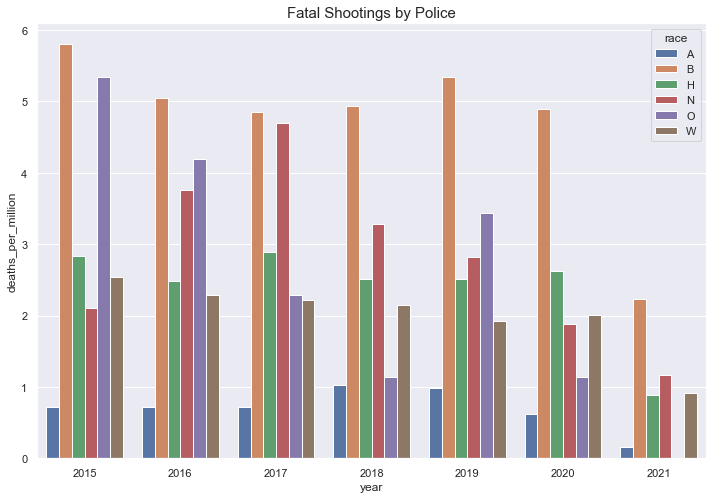

In [64]:
plt.figure(figsize=(12,8))
plt.title("Fatal Shootings by Police", fontsize=15)
sns.barplot(x='year', y='deaths_per_million', hue='race', data=df_race )